In [2]:
import pandas as pd

# load dataframe from CSV file
data = pd.read_csv('data/tobacco-lab_data_Tobacco3482.csv')

In [3]:
data.count()

img_path    3482
label       3482
dtype: int64

In [4]:
nbr = data.shape[0]

for i in range (nbr):
    a = data.get_value(i, 'img_path')
    data.set_value(i, 'img_path', 'data/Tobacco3482-OCR/'+a)
    data.set_value(i, 'img_path', data.get_value(i, 'img_path').split('.jpg')[0]+'.txt')
    data.set_value(i, 'img_path',open(data.get_value(i, 'img_path'), "r").read())

/Users/Akli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/Users/Akli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/Users/Akli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/Akli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/Akli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future re

In [18]:
data.columns = ['text','label']

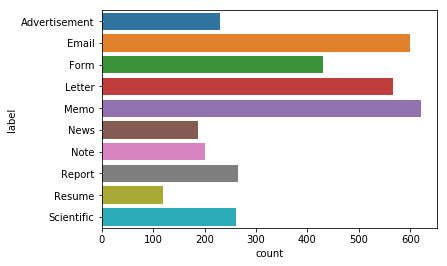

In [19]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
sns.countplot(data=data,y='label')

In [21]:
# Print examples of the articles
print(data.head())
data.iloc[0].text

                                                text          label
0  A Mpertant as yar\nsesiye teaetered cabiieess....  Advertisement
1  TE che fitm\n\nm66400 7127\n\nKOOLS are the on...  Advertisement
2  so ARN Rr nr\n\nBWR Ga ||\n\nVending Operators...  Advertisement
3  MARCH 24,19 VO — 3. Tersrearep\n\n \n\n‘ yi il...  Advertisement
4  ~\n\nSpend a milder moment qs\nwith Raleigh.\n...  Advertisement


'A Mpertant as yar\nsesiye teaetered cabiieess. Baely\n\ndoesn’) keow bea te\nBitton Aau-Fotne bl resin syste. Cant\n\nviduiiliy crafted. Parenter\ntiott, Most eapennese liste rn siichinng\n\nHolimars. Costlicr of course\n\n      \n  \n \n\n“Has Oetenined -\n\nWainy: Thy\nie Hoel? h.\n\nThat Cia\n\nMarg a Féme awe ii na eager ref Hizon a ol\n\n \n\n \n\nRa a\n\n6P9S70099'

In [23]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
(X_train,X_test,y_train,y_test) = train_test_split(data['text'],data['label'],test_size=0.2)
(X_train1,X_dev,y_train1,y_dev) = train_test_split(X_train,y_train,test_size=0.25)

In [24]:
print('train data size=',X_train1.shape[0],'X_test data size=',X_test.shape[0],'dev data size=',X_dev.shape[0])

train data size= 2088 X_test data size= 697 dev data size= 697


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors

vectorizer = CountVectorizer(max_features=2000)
vectorizer.fit(X_train1)
X_train_counts = vectorizer.transform(X_train1)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

In [43]:
print(X_train_counts)

  (0, 11)	3
  (0, 17)	1
  (0, 20)	1
  (0, 23)	2
  (0, 25)	1
  (0, 59)	4
  (0, 62)	1
  (0, 72)	1
  (0, 75)	1
  (0, 76)	1
  (0, 77)	1
  (0, 78)	1
  (0, 89)	1
  (0, 94)	1
  (0, 97)	1
  (0, 107)	1
  (0, 108)	1
  (0, 191)	1
  (0, 226)	1
  (0, 227)	1
  (0, 238)	2
  (0, 243)	8
  (0, 254)	1
  (0, 265)	1
  (0, 269)	1
  :	:
  (2086, 1833)	8
  (2086, 1836)	1
  (2086, 1864)	1
  (2086, 1906)	1
  (2086, 1931)	6
  (2086, 1947)	1
  (2086, 1956)	7
  (2086, 1964)	5
  (2086, 1972)	1
  (2086, 1976)	1
  (2086, 1977)	2
  (2086, 1991)	4
  (2086, 1992)	1
  (2086, 1994)	1
  (2087, 162)	1
  (2087, 202)	1
  (2087, 381)	1
  (2087, 783)	1
  (2087, 818)	1
  (2087, 1025)	1
  (2087, 1283)	1
  (2087, 1609)	1
  (2087, 1642)	1
  (2087, 1780)	1
  (2087, 1931)	1


In [44]:
# train a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_counts, y_train1)
print(clf.score(X_train_counts, y_train1))
print(clf.score(X_dev_counts, y_dev))
print(clf.score(X_test_counts, y_test))

0.8309386973180076
0.7446197991391679
0.7446197991391679
